In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [26]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('/kaggle/input/suicide-watch/Suicide_Detection.csv')

# Check the column names
print(df.columns)

# Assuming the text data is in a column named 'text'
X = df['text']
y = df['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer to the training data and transform both the training and testing data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

# Evaluate the model on the testing data
y_pred = lr_model.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Index(['Unnamed: 0', 'text', 'class'], dtype='object')
Accuracy: 0.9357966174727997
Classification Report:
              precision    recall  f1-score   support

 non-suicide       0.93      0.94      0.94     23287
     suicide       0.94      0.93      0.93     23128

    accuracy                           0.94     46415
   macro avg       0.94      0.94      0.94     46415
weighted avg       0.94      0.94      0.94     46415

Confusion Matrix:
[[22005  1282]
 [ 1698 21430]]


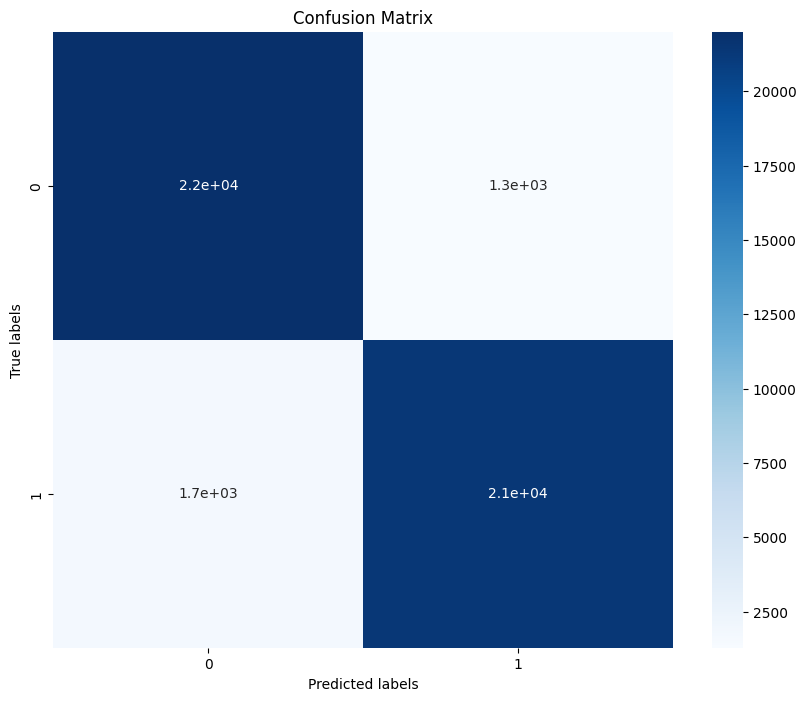

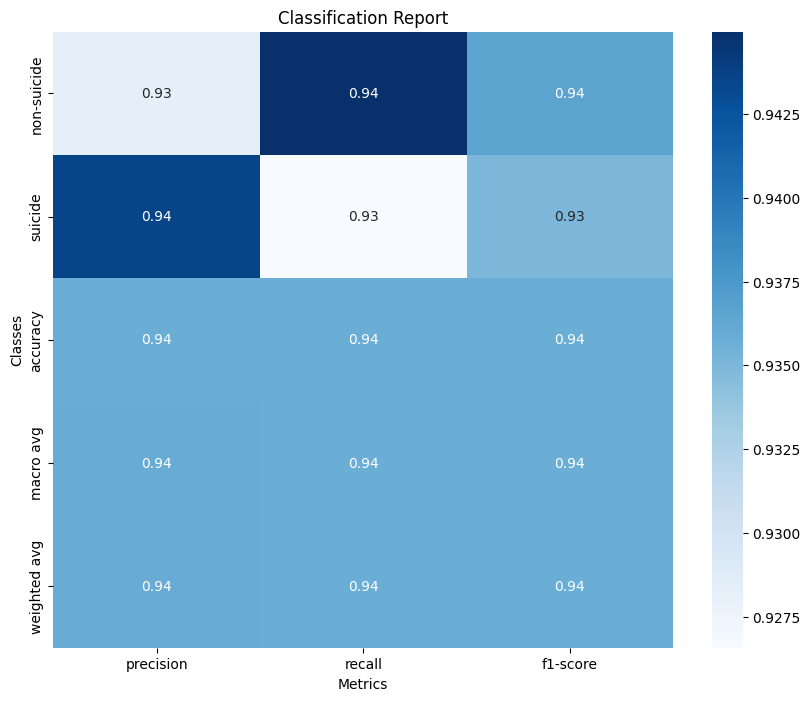

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Plot the classification report
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.title('Classification Report')
plt.show()